# Modeling Financial Credit Rating

In Financial Mathematics, Markov chains can be used to model the default risk of a company or country.

Rating agencies (like <i>Standard & Poor’s</i>, <i>Moody’s</i>, <i>Fitch</i>) rate the financial stability of a company and classify them according to different classes. A possible classification may range from 'AAA' for debitors with a very good credit rating to 'CCC' for debitors which are very likely to delay in paying a debt; and 'D' for those debitors that default.

The yearly credit rating of a company can be modeled as a Markov chain $(X_n)_{n=0,1,2,\ldots}$ with state space

$$ \mathcal{S} = \{ AAA,\, AA,\, A,\, BBB,\, BB,\, B,\, CCC,\, D \} $$

where $X_n$ represents the credit rating class of a company at the $n$-th year. The transition probabilities are given by...

\begin{equation*}
\begin{array}{ccccccccc}
 & AAA & AA & A & BBB & BB & B & CCC & D \\
 AAA & 92,07 & 7,09 & 0,63 & 0,15 & 0,06 & 0,00 & 0,00 & 0,00 \\ 
 AA & 0,62 & 90,84 & 7,76 & 0,59 & 0,06 & 0,10 & 0,02 & 0,01 \\
 A & 0,05 & 2,09 & 91,38 & 5,79 & 0,44 & 0,16 & 0,04 & 0,05 \\
 BBB & 0,03 & 0,21 & 4,10 & 89,37 & 4,82 & 0,86 & 0,24 & 0,37 \\
 BB & 0,03 & 0,08 & 0,40 & 5,54 & 83,24 & 8,15 & 1,11 & 1,45 \\
 B & 0,00 & 0,08 & 0,27 & 0,34 & 5,39 & 82,41 & 4,92 & 6,59 \\
 CCC & 0,10 & 0,00 & 0,29 & 0,58 & 1,55 & 10,54 & 52,80 & 34,14 \\
 D & 0,00 & 0,00 & 0,00 & 0,00 & 0,00 & 0,00 & 0,00 & 100,0
\end{array} 
\end{equation*}

<i>Remark</i>: For our implementations below, we will label the different states from $0$ to $7$, where $0$ represents state $AAA$, $1$ represents state $AA$, and so on.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import csv
%matplotlib inline

## Data

We'll start with loading a matrix from an accompanying external .csv-file.

In [2]:
csvFile = '/Users/hunt_wern/OneDrive/GitHub/Statistical-Analysis/Data/CreditRatingTransMatrixP.csv'
P = []
with open(csvFile,'r') as file:
    reader = csv.reader(file)
    for row in reader:
        P.append([float(prob) for prob in row])

P is a list representing the transition probability matrix. In particular, $P[i][j]$ gives us the probabilities from state $i$ to $j$, for $i,j\in\{0,1,2,\dots, 7\}$.

Let's check to make sure we've uploaded P correctly...

In [3]:
P

[[0.9207, 0.0709, 0.0063, 0.0015, 0.0006, 0.0, 0.0, 0.0],
 [0.0062, 0.9084, 0.0776, 0.0059, 0.0006, 0.001, 0.0002, 0.0001],
 [0.0005, 0.0209, 0.9138, 0.0579, 0.0044, 0.0016, 0.0004, 0.0005],
 [0.0003, 0.0021, 0.041, 0.8937, 0.0482, 0.0086, 0.0024, 0.0037],
 [0.0003, 0.0008, 0.004, 0.0554, 0.8324, 0.0815, 0.0111, 0.0145],
 [0.0, 0.0008, 0.0027, 0.0034, 0.0539, 0.8241, 0.0492, 0.0659],
 [0.001, 0.0, 0.0029, 0.0058, 0.0155, 0.1054, 0.528, 0.3414],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]]

In [4]:
P[0][:]

[0.9207, 0.0709, 0.0063, 0.0015, 0.0006, 0.0, 0.0, 0.0]

## Probability of Not Defaulting

We'll use matrix operations to provide an example of computing the probability that a company which is rated with 'AAA' today will <u>not</u> default during the next 8 years.

The probability that a 'AAA' company does not default in the first year is...

$$\mathbb{P}(X_1 \neq D \mid X_0 = AAA) = 1 - \mathbb{P}(X_1 = D \mid X_0 = AAA) = 1 - P_{18}^1$$

for $P_{ij} = \mathbb{P}(X_1 = j \mid X_0 = i)$ for the row $i$, column $j$ entry in $P$.

Following from this, the probability that the company does not default in the first two years is...

$$\mathbb{P}(X_1 \neq D \text{ and } X_2 \neq D \mid X_0 = AAA) = 1 - \mathbb{P}(X_2 = D \text{ or } X_1 = D \mid X_0 = AAA) = 1 - (P_{18}^1 + P_{18}^2)$$

and so on.

Thus, the probability that the probability that the company does not default in the first 8 years is...

$$\mathbb{P}(X_1 \neq D \text{ and } X_2 \neq D \text{ and } \dots \text{ and } X_8 \neq D \mid X_0 = AAA) = 1 - (P_{18}^1 + P_{18}^2 + \dots + P_{18}^8) = 1 - \sum_{n = 1}^{8}P_{18}^n$$

In [5]:
probDefault = 0
for n in range(1,9):
    newP = np.linalg.matrix_power(P, n)
    probDefault += newP[0][7]
probDefault = 1 - probDefault
    
print("Probability that a 'AAA' company defaults will NOT default in the next 8 years = " + str(probDefault))

Probability that a 'AAA' company defaults will NOT default in the next 8 years = 0.9954584348525004


## Single Markov Chain Simulation

We'll now write a function to simulate the Markov chain for different starting values.

In [6]:
def simulateRating(startRating, numberOfSteps, P):
    ratings = ['AAA','AA','A','BBB','BB','B','CCC','D']
    currRating = startRating
    samplePath = [ratings[currRating]]
    for i in range(1,numberOfSteps + 1):
        newRating = np.random.choice(a=range(8),p=P[currRating])
        samplePath.append(ratings[newRating])
        currRating = newRating
    return samplePath

In [7]:
### Testing our code:
simulateRating(startRating=0, numberOfSteps=10, P=P)

['AAA', 'AAA', 'AAA', 'AAA', 'AAA', 'AAA', 'AAA', 'AAA', 'AAA', 'AAA', 'AAA']

## Full Markov Chain Simulation

Now we can write a code to plot <tt>numPaths</tt> simulated paths of length <tt>lengthPath</tt> with starting value <tt>startRating</tt>.

In [8]:
startRating = 2            
lengthPath = 50
numPaths = 10

sims = []
for i in range(numPaths):
    newSim = simulateRating(startRating,lengthPath,P)
    sims.append(newSim)

([<matplotlib.axis.YTick at 0x122621ba8>,
 <a list of 10 Text yticklabel objects>)

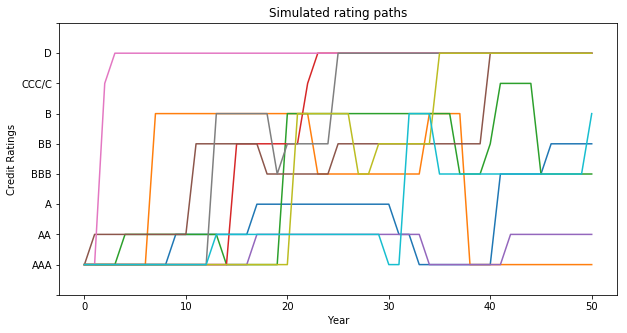

In [9]:
plt.figure( figsize=( 10, 5 ) )
plt.title('Simulated rating paths')
plt.ylabel('Credit Ratings')
plt.xlabel('Year')

for sim in sims:
    plt.plot(range(len(sim)),sim)

plt.ylim(-1,8)
ratings = ['','AAA','AA','A','BBB','BB','B','CCC/C','D','']
plt.yticks(range(-1,9),ratings)

## Long Run Behavior

To study the long-run behavior of the Markov chain, we'll study the outcomes of 100 different 1000 year paths for each starting credit rating, taking the average outcome of each. To study this average, we'll assign each credit rating a different integer, i.e. 'AAA' = 0, 'AA' = 1, 'A' = 2, ... , 'D' = 7.

The goal of this will be to discover a limiting distribution of the Markov chain that is independent of the starting ratings. That is, a limiting distribution $\lambda$ such that $\lim_{n\to\infty}P_{ij}^n = \lambda_j$ for all $j$ and $n$ being the number of trials.

In [10]:
ratings = ['AAA','AA','A','BBB','BB','B','CCC','D']
simOutcomeAvgInts = []
simOutcomeAvgRates = []
for startRating in range(len(ratings)):
    simOutcomes = []
    for k in range(100):
        newSim = simulateRating(startRating,1000,P)
        simOutcomes.append(ratings.index(newSim[-1]))
    avgOutcome = sum(simOutcomes)/100
    simOutcomeAvgInts.append(avgOutcome)
    simOutcomeAvgRates.append(ratings[int(avgOutcome)])

print('Starting ratings:')
print(ratings)
print('')
print('Average outcome:')
print(simOutcomeAvgInts)
print(simOutcomeAvgRates)

Starting ratings:
['AAA', 'AA', 'A', 'BBB', 'BB', 'B', 'CCC', 'D']

Average outcome:
[7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0]
['D', 'D', 'D', 'D', 'D', 'D', 'D', 'D']


As seen after running the above simulations, each simulation, regardless of starting rating, has an average outcome of 7.0, or default. That is, the long-run behavior of the Markov chain leads a company to default and is independent of the starting rating given to the company.

From this observation, we can conclude that for all $j$ in $P$, the limiting distribution is: $\lambda_j = (0,0,0,0,0,0,1)$.